In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [37]:
df = pd.read_csv("income.csv")

In [38]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


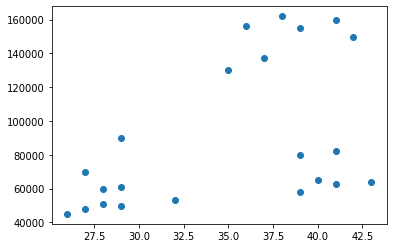

In [39]:
plt.scatter(df["Age"], df["Income($)"])

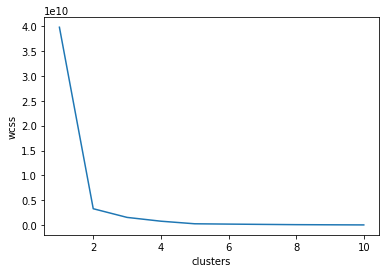

In [40]:
wcss = []
for i in range (1,11):
    k = KMeans(n_clusters = i)
    k.fit(df[["Age","Income($)"]])
    wcss.append(k.inertia_)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.plot(range(1,11),wcss)

In [41]:
k = KMeans(n_clusters = 3)
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
y_predicted =k.fit_predict(df[["Age", "Income($)"]])

In [43]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [44]:
df["cluster"] = y_predicted

In [45]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


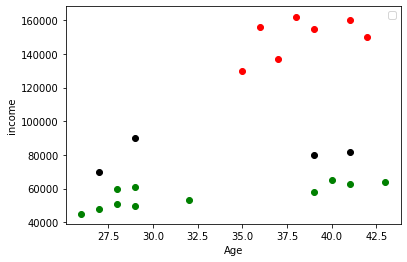

In [46]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1["Age"], df1["Income($)"], color = 'green')
plt.scatter(df2["Age"], df2["Income($)"], color = 'red')
plt.scatter(df3["Age"], df3["Income($)"], color = 'black')

plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

In [47]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income($)"] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df["Age"] = scaler.transform(df[['Age']])

In [48]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [49]:
k = KMeans(n_clusters = 3)
y_predicted =k.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [50]:
df["cluster1"] = y_predicted
df.drop('cluster', axis = 'columns', inplace = True)

In [32]:
df

,Name,Age,Income($),cluster1
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [52]:
k.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

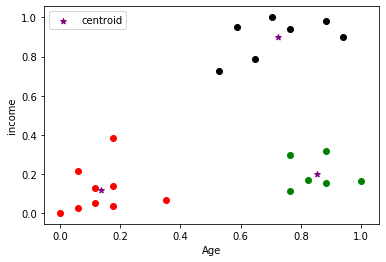

In [33]:
df1 = df[df.cluster1 == 0]
df2 = df[df.cluster1 == 1]
df3 = df[df.cluster1 == 2]

plt.scatter(df1["Age"], df1["Income($)"], color = 'green')
plt.scatter(df2["Age"], df2["Income($)"], color = 'red')
plt.scatter(df3["Age"], df3["Income($)"], color = 'black')

plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

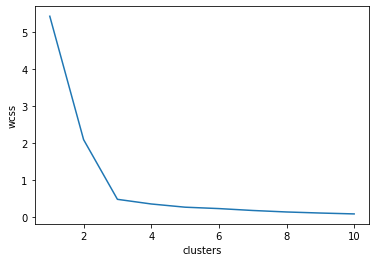

In [53]:
wcss = []
for i in range (1,11):
    k = KMeans(n_clusters = i)
    k.fit(df[["Age","Income($)"]])
    wcss.append(k.inertia_)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.plot(range(1,11),wcss)

In [54]:
wcss

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22443334487241418,
 0.17310821424993492,
 0.13265419827245162,
 0.10383752586603559,
 0.07996937425152907]